In [2]:
import os

import torch

from torch import nn
from torch import optim

import matplotlib.pyplot as plt

In [3]:
#----------------------------------------

trainingSetX = torch.tensor([
    [
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1]
    ],
    [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ],
    [
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0]
    ],
    [
        [1, 0, 1],
        [0, 1, 0],
        [1, 0, 1]
    ]
], dtype=torch.float).reshape(4, 9)

#----------------------------------------

trainingSetY = torch.tensor([
    [0],
    [0],
    [1],
    [1]
], dtype=torch.float)

#----------------------------------------

testSetX = torch.tensor([
    [
        [0, 1, 1],
        [1, 0, 1],
        [1, 1, 0]
    ],
    [
        [1, 0, 1],
        [1, 0, 1],
        [1, 1, 0]
    ],
    [
        [1, 0, 1],
        [0, 0, 0],
        [1, 0, 1]
    ],
    [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ],
    [
        [1, 0, 0],
        [1, 1, 1],
        [0, 0, 1]
    ],
    [
        [0, 0, 1],
        [1, 1, 1],
        [1, 0, 0]
    ],
    [
        [0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]
    ],
    [
        [1, 0, 0],
        [1, 1, 0],
        [1, 0, 0]
    ]
], dtype=torch.float).reshape(8, 9)

#----------------------------------------

testSetY = torch.tensor([
    [0],
    [0],
    [0],
    [0],
    [1],
    [1],
    [1],
    [1]
], dtype=torch.float)

#----------------------------------------

print(trainingSetX.shape)
print(trainingSetY.shape)

#----------------------------------------

print(testSetX.shape)
print(testSetY.shape)

#----------------------------------------

torch.Size([4, 9])
torch.Size([4, 1])
torch.Size([8, 9])
torch.Size([8, 1])


In [4]:
#----------------------------------------

device = (

    "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

)

#----------------------------------------

print(f"Using {device} device")

#----------------------------------------

Using cpu device


In [5]:
#----------------------------------------

class CrossCircleDetector(nn.Module):
    
    def __init__(self, inputs, outputs):
        
        super().__init__()
        
        # Simple linear connections
        self.inOut = nn.Linear(inputs, outputs)
        
        # Sigmoid squishification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        
        return self.sigmoid(self.inOut(x))

#----------------------------------------

CrossCircleDetector(
  (inOut): Linear(in_features=9, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


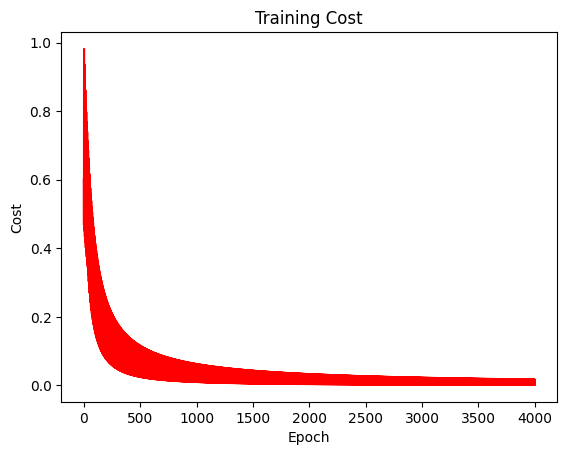

In [6]:
#----------------------------------------

epochs = 1000

learningRate = 0.1

#----------------------------------------

# Simplest possible network: 9 inputs and 1 output (binary: 0 when < 0.5 and 1 when > 0.5)
model = CrossCircleDetector(9, 1)

print(model)

#----------------------------------------

losses = []

# Take binary cross entropy as loss function (one output interpreted as binary)
lossFunction = nn.BCELoss()

# Use stochastic gradient descent as optimizer, use weights and biases of model
gradientDescent = torch.optim.SGD(model.parameters(), lr=learningRate)

#----------------------------------------

for i in range(epochs):
    
    for x, y in zip(trainingSetX, trainingSetY):
    
        # Reset the gradient delta's (dw, db)
        gradientDescent.zero_grad()

        # Forward step
        yhat = model(x)

        # Compute loss
        loss = lossFunction(yhat, y)

        # Keep track of loss
        losses.append(loss.item())

        # Apply gradient descent (via backpropagation)
        loss.backward()

        # Use w += -step * dw * learnRate
        gradientDescent.step()

#----------------------------------------

fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(4 * epochs)], losses, 'red')
plt.show()

#----------------------------------------

In [7]:
#----------------------------------------

# Let's compare
for x, y in zip(testSetX, testSetY):

    print(f"actual: {round(y.item())}, predicted: {model(x).item()}, rounded: {round(model(x).item())}")
    
#----------------------------------------
for param in model.parameters():
    print(param.data)

actual: 0, predicted: 0.006560835987329483, rounded: 0
actual: 0, predicted: 0.012053013779222965, rounded: 0
actual: 0, predicted: 0.16973049938678741, rounded: 0
actual: 0, predicted: 0.016862858086824417, rounded: 0
actual: 1, predicted: 0.9950031638145447, rounded: 1
actual: 1, predicted: 0.9953047037124634, rounded: 1
actual: 1, predicted: 0.9981868863105774, rounded: 1
actual: 1, predicted: 0.9983225464820862, rounded: 1
tensor([[-0.5542, -1.1679, -0.5841, -1.1966,  8.1261, -1.0025, -0.3703, -1.0826,
         -0.4628]])
tensor([0.3839])
